In [2]:
import zipfile
import os

zip_path = "/content/brain-tumor-mri-dataset.zip"          # uploaded file ka naam
extract_path = "/content/dataset" # at whch directory
                                  # we have to extract
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done! Files are in:", extract_path)


Extraction done! Files are in: /content/dataset


In [21]:
print(os.listdir(extract_path))


['Testing', 'Training']


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

**glioma brain visuals**

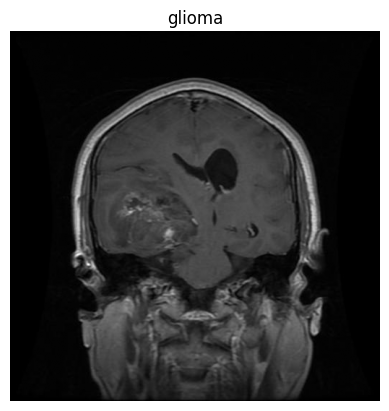

In [5]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg
G = "/content/dataset/Training/glioma"
for i in random.sample(os.listdir(G), 1):
    plt.imshow(mpimg.imread(os.path.join(G, i)), cmap='gray')
    plt.title("glioma")
    plt.axis('off')
    plt.show()


# New section

**visuals of random brain images from all classes**

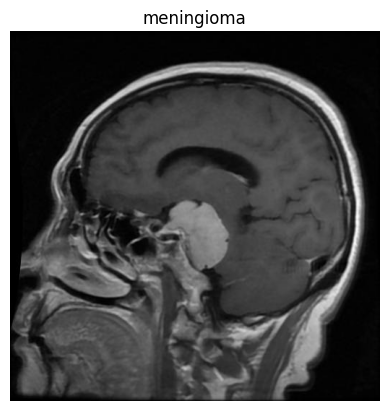

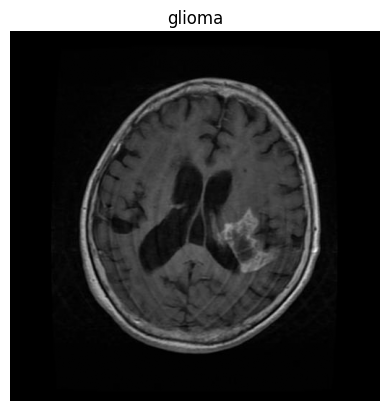

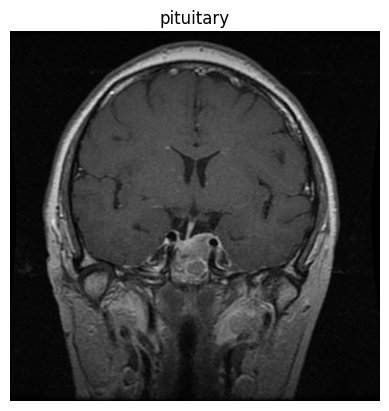

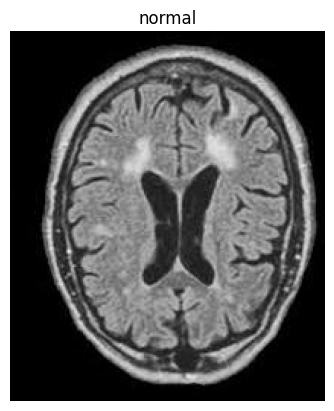

In [6]:
import os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 4 class folders ke paths
paths = {
    "meningioma": "/content/dataset/Training/meningioma",
    "glioma": "/content/dataset/Training/glioma",
    "pituitary": "/content/dataset/Training/pituitary",
    "normal": "/content/dataset/Training/notumor"
}

# Har class se 1 random image display
for label, folder in paths.items():
    img_name = random.choice(os.listdir(folder))       # ek random image
    img_path = os.path.join(folder, img_name)

    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')  # grayscale hai to cmap='gray'
    plt.title(label)
    plt.axis('off')
    plt.show()


**Counting original Dataset of 4 classes**

In [7]:
# import os

normal_count = len(os.listdir("/content/dataset/Training/notumor"))
pituitary_count = len(os.listdir("/content/dataset/Training/pituitary"))
meningioma_count = len(os.listdir("/content/dataset/Training/meningioma"))
glioma_count = len(os.listdir("/content/dataset/Training/glioma"))

print("notumor images:",normal_count)
print("pituitary images:",pituitary_count)
print("meningioma images:",meningioma_count)
print("glioma images:", glioma_count)

notumor images: 1595
pituitary images: 1457
meningioma images: 1339
glioma images: 1321


**Taking Datasets into Chunks 250 - 250**

In [8]:
# mini batch training ..
# this 250 - 250 dataset we  have assigned into
#  newly made "small datase " folder from
# "content/dataset/training" directory"
import os, random, shutil

classes = ["notumor", "pituitary", "meningioma", "glioma"]
original_base = "/content/dataset/Training"
subset_base = "/content/small_dataset"
os.makedirs(subset_base, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(subset_base, cls), exist_ok=True)
    images = os.listdir(os.path.join(original_base, cls))
    selected = random.sample(images, 250)  # 250 images per class
    for img in selected:
        shutil.copy(os.path.join(original_base, cls, img),
                    os.path.join(subset_base, cls, img))


**counting of Subset images Data**

In [9]:
import os

subset_base = "/content/small_dataset"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(subset_base, cls)
    count = len(os.listdir(path))
    print(f"{cls} images:", count)


notumor images: 250
pituitary images: 250
meningioma images: 250
glioma images: 250


**Train split from for validation**

In [10]:
from sklearn.model_selection import train_test_split

train_dir = "/content/small_train"
val_dir   = "/content/small_val"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    images = os.listdir(os.path.join(subset_base, cls))
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(subset_base, cls, img),
                    os.path.join(train_dir, cls, img))
    for img in val_imgs:
        shutil.copy(os.path.join(subset_base, cls, img),
                    os.path.join(val_dir, cls, img))


**Our new Training data**

In [11]:
import os

train_dir = "/content/small_train"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(train_dir, cls)
    count = len(os.listdir(path))
    print(f"{cls} train images:", count)


notumor train images: 200
pituitary train images: 200
meningioma train images: 200
glioma train images: 200


**Our Validation data**

In [12]:
import os

val_dir = "/content/small_val"   # tumhara validation directory
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(val_dir, cls)
    count = len(os.listdir(path))
    print(f"{cls} images in validation:", count)


notumor images in validation: 50
pituitary images in validation: 50
meningioma images in validation: 50
glioma images in validation: 50


**Defining Data Augmentation**

In [13]:
#   Defining Image Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
)


In [14]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    "/content/small_train",
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical',
    shuffle = True
)
 # train_generator = train_datagen.flow_from_directory
#  important line

Found 800 images belonging to 4 classes.


In [15]:
# Validation generator
val_generator = train_datagen.flow_from_directory(
    "/content/small_val",
    target_size=(224,224),
    batch_size= 16 ,
    class_mode='categorical',
    shuffle=False
)


Found 200 images belonging to 4 classes.


**customized CNN architecture**

In [16]:
# customized convolution architecture

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(                                                  2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')   # 4 classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Compilation**

In [17]:
model.compile(
    loss='categorical_crossentropy',     # 2 classes => categorical
    optimizer='adam',
    metrics=['accuracy']
)

**Fitting the Model**

In [20]:
# adding auguments in model fit
history = model.fit(
    train_generator,         # augmented training images
    validation_data=val_generator,  # validation images
    epochs=50
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.8192 - loss: 0.4367 - val_accuracy: 0.8050 - val_loss: 0.5213
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 258ms/step - accuracy: 0.8222 - loss: 0.4615 - val_accuracy: 0.7400 - val_loss: 0.8054
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.7842 - loss: 0.4885 - val_accuracy: 0.8000 - val_loss: 0.5141
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.8312 - loss: 0.4108 - val_accuracy: 0.8300 - val_loss: 0.4990
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.8220 - loss: 0.4558 - val_accuracy: 0.7850 - val_loss: 0.5450
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - accuracy: 0.8349 - loss: 0.4082 - val_accuracy: 0.8000 - val_loss: 0.5705
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.8506 - loss: 0.3863 - val_accuracy: 0.7950 - val_loss: 0.5642
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 261ms/step - accuracy: 0.8220 - loss: 0.4187 - val_accu

In [ ]:
# import tensorflow as tf

# test_ds_path = ""

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     test_ds_path,
#     shuffle=False,
#     image_size=(224,224),
#     batch_size=1
# )

# class_names = test_ds.class_names
# print("Classes:", class_names)

In [ ]:
# import numpy as np

# # here prediction takes place of all test images
# preds = model.predict(test_ds)               # shape: (num_images, num_classes)
# pred_classes = np.argmax(preds, axis=1)      # predicted class for each image

# # 2. all actual labels
# true_classes = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# # 3. computing accuracy here
# accuracy = np.mean(pred_classes == true_classes) * 100

# print(f"Accuracy: {accuracy:.2f}%")

In [22]:
# mini batch training ..
# this 250 - 250 dataset we  have assigned into
#  newly made "small datase " folder from
# "content/dataset/training" directory"
import os, random, shutil

classes = ["notumor", "pituitary", "meningioma", "glioma"]
original_base = "/content/dataset/Testing"
subset_base = "/content/small_test_dataset"
os.makedirs(subset_base, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(subset_base, cls), exist_ok=True)
    images = os.listdir(os.path.join(original_base, cls))
    selected = random.sample(images, 250)  # 250 images per class
    for img in selected:
        shutil.copy(os.path.join(original_base, cls, img),
                    os.path.join(subset_base, cls, img))


In [23]:
import os

subset_base = "/content/small_test_dataset"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(subset_base, cls)
    count = len(os.listdir(path))
    print(f"{cls} images:", count)

notumor images: 250
pituitary images: 250
meningioma images: 250
glioma images: 250


In [26]:
import tensorflow as tf

test_ds_path = "/content/small_test_dataset"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_ds_path,
    shuffle=False,
    image_size=(224,224),
    batch_size=1
)

class_names = test_ds.class_names

Found 1000 files belonging to 4 classes.


In [27]:
import numpy as np

# here prediction takes place of all test images
preds = model.predict(test_ds)               # shape: (num_images, num_classes)
pred_classes = np.argmax(preds, axis=1)      # predicted class for each image

# 2. all actual labels
true_classes = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# 3. computing accuracy here
accuracy = np.mean(pred_classes == true_classes) * 100

print(f"Accuracy: {accuracy:.2f}%")

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy: 25.70%
